# CORRELATION ANALYSIS
### Correlation analysis provides a way to measure the strength and direction of the **linear relationship** between variables.

### Methods for performing correlation analysis

In [1]:
# Loading in-built attitude dataset 
data(attitude)

In [2]:
# data
print(head(attitude))

  rating complaints privileges learning raises critical advance
1     43         51         30       39     61       92      45
2     63         64         51       54     63       73      47
3     71         70         68       69     76       86      48
4     61         63         45       47     54       84      35
5     81         78         56       66     71       83      47
6     43         55         49       44     54       49      34


#### Pearson Correlation:

- **Suitable for:** Continuous variables with a linear relationship.
- **Assumption:** Assumes that the relationship between variables is linear and that the data follows a normal distribution.
- **Calculation:** Calculates the linear correlation coefficient between two continuous variables. It measures how well the data points fit on a straight line.

In [3]:
# Finding correlation between any two variables
cor(attitude[,"rating"],attitude[,"complaints"])

[1] 0.8254176

#### Spearman's Rank Correlation:

- **Suitable for:** Ordinal or continuous variables with a monotonic relationship (not necessarily linear).
- **Assumption:** Does not assume a specific distribution of data. It measures the strength and direction of the monotonic relationship between variables.
- **Calculation:** Calculates the correlation between the ranks of data points. It's useful when the relationship is not strictly linear but still shows a consistent trend.

In [4]:
cor(attitude[,"rating"],attitude[,"complaints"],method = "spearman")

[1] 0.8322006

#### Kendall's Tau Correlation:

- **Suitable for:** Ordinal or continuous variables with a monotonic relationship.
- **Assumption:** Similar to Spearman's method, it doesn't assume a specific distribution. It measures the strength and direction of a monotonic relationship.
- **Calculation:** Calculates the correlation based on concordant and discordant pairs of data points. It's often used when dealing with non-linear relationships or data with tied ranks.

In [5]:
cor(attitude[,"rating"],attitude[,"complaints"],method = "kendall")

[1] 0.6549712

#### For comparing multiple variables

In [6]:
# correlation matrix
corr_matrix = round(cor(attitude),digits = 2)
print(corr_matrix)

           rating complaints privileges learning raises critical advance
rating       1.00       0.83       0.43     0.62   0.59     0.16    0.16
complaints   0.83       1.00       0.56     0.60   0.67     0.19    0.22
privileges   0.43       0.56       1.00     0.49   0.45     0.15    0.34
learning     0.62       0.60       0.49     1.00   0.64     0.12    0.53
raises       0.59       0.67       0.45     0.64   1.00     0.38    0.57
critical     0.16       0.19       0.15     0.12   0.38     1.00    0.28
advance      0.16       0.22       0.34     0.53   0.57     0.28    1.00


#### Visualization with scatterplot (For linear relationship)

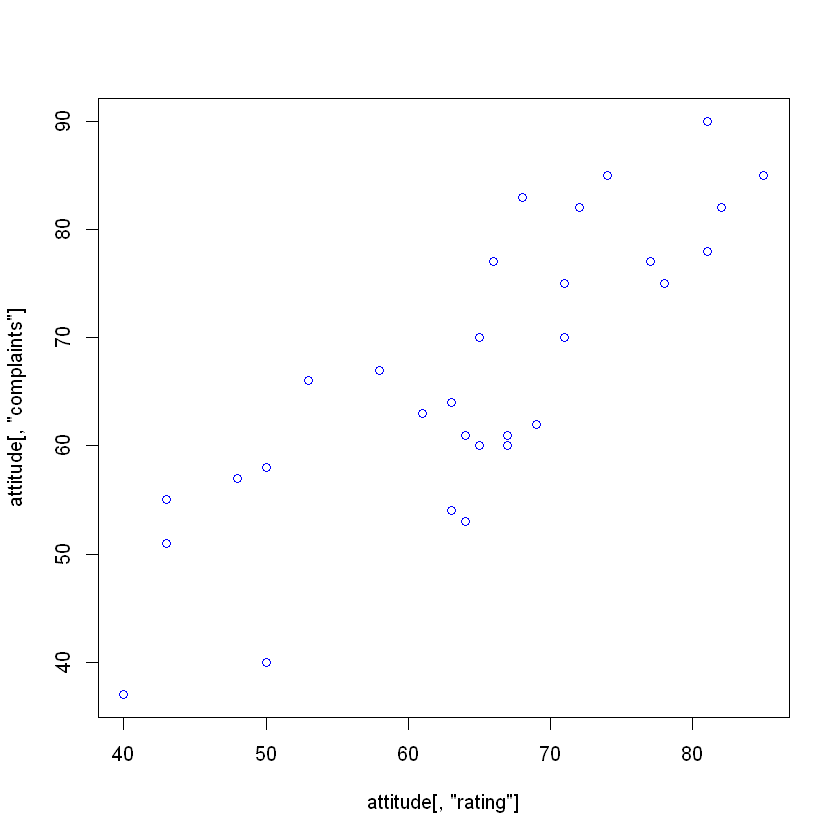

In [7]:
# For two variables
plot(attitude[,"rating"],attitude[,"complaints"],col = "blue")

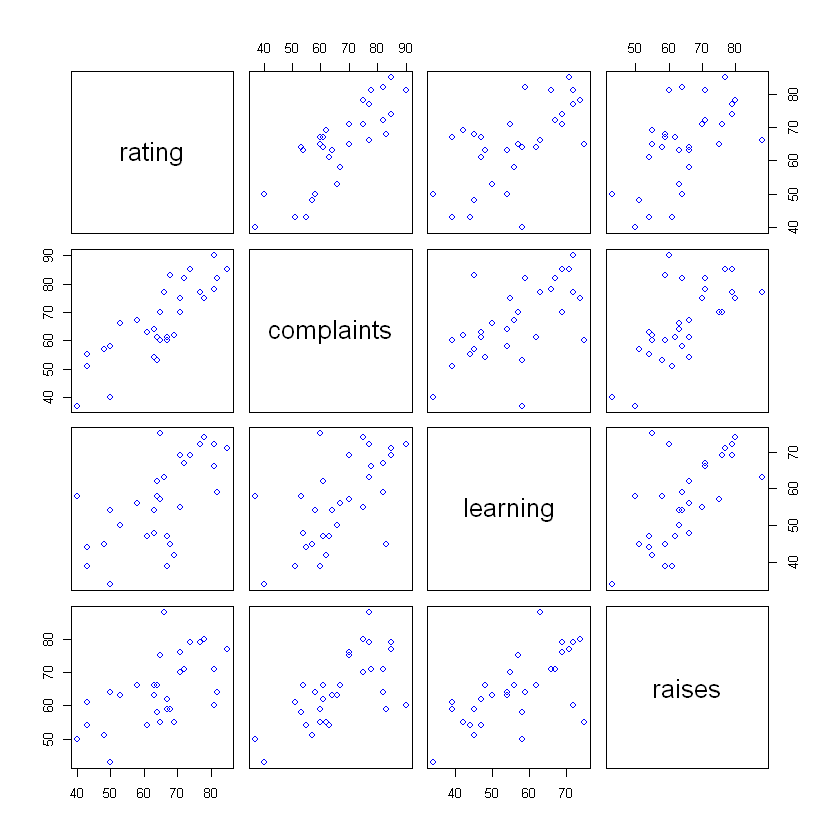

In [8]:
# For multiple variables at a time
pairs(attitude[,c("rating","complaints","learning","raises")],col = "blue")

## Correlation matrix 

corrplot 0.92 loaded



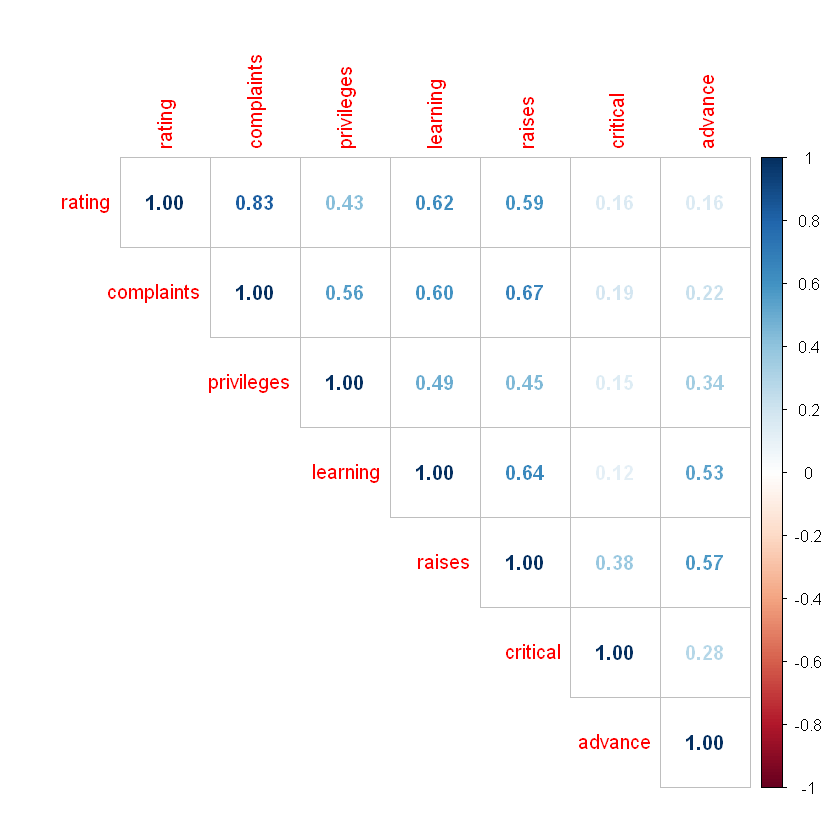

In [9]:
library(corrplot)

corrplot(cor(attitude),method = "number",type = "upper" )

### Correlation coefficient and its intepretation

Interpreting the correlation coefficient involves understanding the strength and direction of the relationship between two variables. 

1. **Perfect Positive Correlation (r = +1)**:
   - When the correlation coefficient is +1, it indicates a perfect positive linear relationship between the variables.
   - As one variable increases, the other variable also increases proportionally.
   - All data points fall exactly on a straight line.

2. **High Positive Correlation (0.7 ≤ r < 1)**:
   - A correlation coefficient in this range indicates a strong positive linear relationship between the variables.
   - As one variable increases, the other variable tends to increase as well, but not necessarily exactly proportionally.

3. **Moderate Positive Correlation (0.3 ≤ r < 0.7)**:
   - A correlation coefficient in this range suggests a moderate positive linear relationship.
   - There is a tendency for the variables to move in the same direction, but the relationship might not be very strong.

4. **No Correlation (r ≈ 0)**:
   - When the correlation coefficient is close to 0, it suggests that there is little to no linear relationship between the variables.
   - Changes in one variable are not associated with consistent changes in the other variable.

5. **Moderate Negative Correlation (-0.3 ≥ r > -0.7)**:
   - A correlation coefficient in this range indicates a moderate negative linear relationship.
   - As one variable increases, the other variable tends to decrease, but not necessarily exactly proportionally.

6. **High Negative Correlation (-0.7 ≥ r > -1)**:
   - A correlation coefficient in this range suggests a strong negative linear relationship between the variables.
   - As one variable increases, the other variable tends to decrease, and vice versa.

7. **Perfect Negative Correlation (r = -1)**:
   - When the correlation coefficient is -1, it indicates a perfect negative linear relationship between the variables.
   - As one variable increases, the other variable decreases exactly proportionally.
   - All data points fall exactly on a straight line, but with a negative slope.

**Note :** correlation does not imply causation 
- A strong correlation between two variables does not necessarily mean that changes in one variable cause changes in the other. Additionally, correlation is a measure of linear association, so it might not capture non-linear relationships.

### **Testing of Hypothesis for Correlation between two variables**
**Null Hypothesis (H0):**
The null hypothesis in a correlation test states that there is no linear correlation between the two variables in the population. In other words, the true correlation coefficient in the population is zero.

**Alternative Hypothesis (H1):**
The alternative hypothesis suggests that there is a linear correlation between the two variables in the population. It could be either positive or negative correlation, but it's not zero.

The test assesses whether the observed sample correlation is significantly different from zero. If the p-value (probability value) associated with the test is very small (usually below a significance level like 0.05), you might reject the null hypothesis in favor of the alternative hypothesis, indicating a statistically significant correlation.

**Assumptions:**

- Independence: The observations are independent of each other.
- Linearity: The relationship between the variables is linear.
- Normality: The variables should be approximately normally distributed.
- Homoscedasticity: The variances of the two variables are roughly equal for different values of the other variable.

In [10]:
## For Two variables 
cat("Null Hypothesis : The true correlation coefficient in the population is zero.\n")
cat("Alternative Hypothesis : The true correlation coefficient could be either positive or negative correlation, but it's not zero.")
test <- cor.test(attitude[,"rating"], attitude[,"complaints"])
test
if(test$p.value <- 0.05){
    print("Null hypothesis rejected : (i.e) There is either positive or negative corretion.")
}else{
    print("Could not reject th null hypothesis : (i.e) No correlation")

}


Null Hypothesis : The true correlation coefficient in the population is zero.
Alternative Hypothesis : The true correlation coefficient could be either positive or negative correlation, but it's not zero.


	Pearson's product-moment correlation

data:  attitude[, "rating"] and attitude[, "complaints"]
t = 7.737, df = 28, p-value = 1.988e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6620128 0.9139139
sample estimates:
      cor 
0.8254176 


[1] "Null hypothesis rejected : (i.e) There is either positive or negative corretion."


In [11]:
# For several variables at a time
library(Hmisc)
test <- rcorr(as.matrix(attitude))


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




In [12]:
round(test$P,4)

,rating,complaints,privileges,learning,raises,critical,advance
rating,NA,0.0000,0.0189,0.0002,0.0006,0.4091,0.4132
complaints,0.0000,NA,0.0013,0.0005,0.0001,0.3205,0.2328
privileges,0.0189,0.0013,NA,0.0056,0.0136,0.4375,0.0633
learning,0.0002,0.0005,0.0056,NA,0.0001,0.5417,0.0025
raises,0.0006,0.0001,0.0136,0.0001,NA,0.0401,0.0009
critical,0.4091,0.3205,0.4375,0.5417,0.0401,NA,0.1292
advance,0.4132,0.2328,0.0633,0.0025,0.0009,0.1292,NA
